In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from scipy import stats

from scipy.stats import ttest_ind

# Equal Threshold: n=4 and empty=10%

In [22]:
#--------------------
#   Fazer as médias com todas as runs
#--------------------

read_overall = pd.read_csv('df_overall.csv', delimiter = ',')
#read_overall 

sum_up = pd.DataFrame(columns=[
                            'p_adap', 
                            'seg_pop_initial',
                            'seg_pop_final', 
                            'seg_threshold_initial',
                            'seg_threshold_final',
                            'mean_final_threshold',
                            'mode_final_threshold',
                            '2nd_mode_final_threshold'])

yerr_pop_initial = []
yerr_thre_initial = []

yerr_pop_final = []
yerr_thre_final = []

for p in np.arange(0,1.05,0.1):
    p_overall = read_overall.loc[(read_overall['p_adap']<= p + 0.01) & (read_overall['p_adap']>= p - 0.01)]
    
    sum_up = sum_up.append({'p_adap':                   p, 
                            'seg_pop_initial':          p_overall['seg_pop_initial'].mean(),
                            'seg_pop_final':            p_overall['seg_pop_final'].mean(), 
                            'seg_threshold_initial':    p_overall['seg_threshold_initial'].mean(),
                            'seg_threshold_final':      p_overall['seg_threshold_final'].mean(),
                            'mean_final_threshold':     p_overall['mean_final_threshold'].mean(),
                            'mode_final_threshold':     p_overall['mode_final_threshold'].mean(),
                            '2nd_mode_final_threshold': p_overall['2nd_mode_final_threshold'].mean()
     },ignore_index=True)
    
    yerr_pop_initial.append(abs(p_overall['seg_pop_initial'].std())) 
    yerr_thre_initial.append(abs(p_overall['seg_threshold_initial'].std()))
    
    yerr_pop_final.append(abs(p_overall['seg_pop_final'].std())) 
    yerr_thre_final.append(abs(p_overall['seg_threshold_final'].std()))
    
sum_up

,p_adap,seg_pop_initial,seg_pop_final,seg_threshold_initial,seg_threshold_final,mean_final_threshold,mode_final_threshold,2nd_mode_final_threshold
0,0.0,0.048869,0.598317,0.109560,0.109560,3.60544,4.0,0.0
1,0.1,0.057714,0.560559,0.116577,0.067597,3.93920,4.0,0.0
2,0.2,0.055808,0.512557,0.115112,0.130028,4.29824,4.0,8.0
3,0.3,0.051674,0.430480,0.114739,0.202112,4.66912,4.0,8.0
4,0.4,0.051355,0.354206,0.109595,0.251684,5.05632,4.0,8.0
5,0.5,0.043984,0.282950,0.107113,0.272300,5.39840,4.8,7.2
6,0.6,0.048737,0.223751,0.111149,0.259210,5.75872,8.0,4.0
7,0.7,0.053157,0.144786,0.108899,0.205318,6.12912,8.0,4.0
8,0.8,0.048830,0.067606,0.107286,0.108159,6.10224,7.4,7.6
9,0.9,0.054170,0.056651,0.110153,0.093767,5.96856,7.0,1.2


In [23]:

for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall.loc[(read_overall['p_adap']<= p + 0.01) & (read_overall['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall['seg_pop_initial'], p_overall['seg_pop_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-138.641, p=0.000
Different distributions (reject H0)
--------------Probability:  0.1
Statistics=-122.230, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-103.307, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-91.456, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-76.615, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-55.506, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-38.868, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-21.235, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-4.051, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-1.258, p=0.213
Same distributions (fail to r

In [24]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall.loc[(read_overall['p_adap']<= p + 0.01) & (read_overall['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall['seg_threshold_initial'], p_overall['seg_threshold_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=0.350, p=0.728
Same distributions (fail to reject H0)
--------------Probability:  0.1
Statistics=12.301, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-4.961, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-17.382, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-32.731, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-39.801, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-35.066, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-23.760, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=0.696, p=0.489
Same distributions (fail to reject H0)
--------------Probability:  0.9
Statistics=4.766, p=0.000
Different distributions (reject 

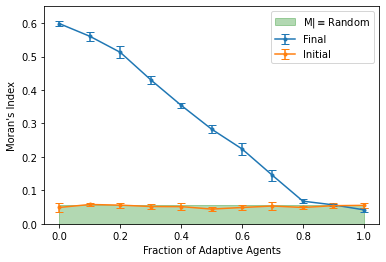

Lower bound:  0.04779548408708629
Upper bound:  0.05573353388344476


In [25]:
fig, ax = plt.subplots()

plt.errorbar(sum_up['p_adap'], sum_up['seg_pop_final'],   
             yerr = yerr_pop_final,
             capsize=4,
             marker='.',
             label='Final')

plt.errorbar(sum_up['p_adap'], sum_up['seg_pop_initial'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up['p_adap'], 
                -sum_up['seg_pop_initial'].mean() - sum_up['seg_pop_initial'].std(),
                sum_up['seg_pop_initial'].mean() + sum_up['seg_pop_initial'].std(),
                color= 'green',alpha= 0.3,label='M|$\equiv$Random')

plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(0,0.65)
plt.legend()
plt.show()


print("Lower bound: ", sum_up['seg_pop_initial'].mean() - sum_up['seg_pop_initial'].std() )
print("Upper bound: ", sum_up['seg_pop_initial'].mean() + sum_up['seg_pop_initial'].std() )

fig.savefig('EqualThreshold_SegPop.pdf', bbox_inches='tight', dpi=150)

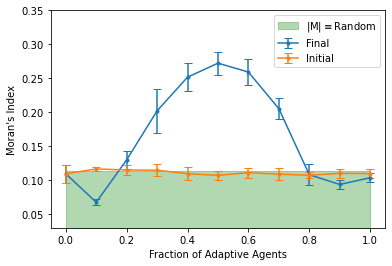

Lower bound:  0.10771699323859446
Upper bound:  0.11409011865191171


In [7]:
fig, ax = plt.subplots()

plt.errorbar(sum_up['p_adap'], sum_up['seg_threshold_final'],
            yerr = yerr_thre_final,
            capsize=4,
             marker='.',
            label='Final')

plt.errorbar(sum_up['p_adap'], sum_up['seg_threshold_initial'],
            yerr = yerr_thre_initial,
            capsize=4,
             marker='.',
            label='Initial')

ax.fill_between(sum_up['p_adap'], 
                -sum_up['seg_threshold_initial'].mean() - sum_up['seg_threshold_initial'].std(),
                sum_up['seg_threshold_initial'].mean() + sum_up['seg_threshold_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')

plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(0.03,0.35)
plt.legend()
plt.show()

plt.show()
print("Lower bound: ", sum_up['seg_threshold_initial'].mean() - sum_up['seg_threshold_initial'].std() )
print("Upper bound: ", sum_up['seg_threshold_initial'].mean() + sum_up['seg_threshold_initial'].std() )

fig.savefig('EqualThreshold_SegThreshold.pdf', bbox_inches='tight', dpi=150)

# Different thresholds : $n \in [4,8]$ and empty=10%

In [8]:
#--------------------
#   Fazer as médias com todas as runs
#--------------------

read_overall_BroadenThres = pd.read_csv('df_overall_threshold.csv', delimiter = ',')
#read_overall 

sum_up_BroadenThres = pd.DataFrame(columns=[
                            'p_adap', 
                            'seg_pop_initial',
                            'seg_pop_final', 
                            'seg_threshold_initial',
                            'seg_threshold_final',
                            'mean_final_threshold',
                            'mode_final_threshold'])

yerr_pop_initial = []
yerr_thre_initial = []

yerr_pop_final = []
yerr_thre_final = []

for p in np.arange(0,1.05,0.1):
    p_overall_BroadenThres = read_overall_BroadenThres.loc[(read_overall_BroadenThres['p_adap']<= p + 0.01) & (read_overall_BroadenThres['p_adap']>= p - 0.01)]
    
    sum_up_BroadenThres = sum_up_BroadenThres.append({'p_adap':                   p, 
                            'seg_pop_initial':          p_overall_BroadenThres['seg_pop_initial'].mean(),
                            'seg_pop_final':            p_overall_BroadenThres['seg_pop_final'].mean(), 
                            'seg_threshold_initial':    p_overall_BroadenThres['seg_threshold_initial'].mean(),
                            'seg_threshold_final':      p_overall_BroadenThres['seg_threshold_final'].mean(),
                            'mean_final_threshold':     p_overall_BroadenThres['mean_final_threshold'].mean(),
                            'mode_final_threshold':     p_overall_BroadenThres['mode_final_threshold'].mean()
     },ignore_index=True)
    
    yerr_pop_initial.append(abs(p_overall_BroadenThres['seg_pop_initial'].std())) 
    yerr_thre_initial.append(abs(p_overall_BroadenThres['seg_threshold_initial'].std()))
    
    yerr_pop_final.append(abs(p_overall_BroadenThres['seg_pop_final'].std())) 
    yerr_thre_final.append(abs(p_overall_BroadenThres['seg_threshold_final'].std()))
    
sum_up_BroadenThres

,p_adap,seg_pop_initial,seg_pop_final,seg_threshold_initial,seg_threshold_final,mean_final_threshold,mode_final_threshold
0,0.0,0.056935,0.398326,0.081531,0.116165,4.93128,5.6
1,0.1,0.061339,0.284742,0.080689,0.124444,5.15720,5.2
2,0.2,0.061022,0.199189,0.084212,0.134975,5.37568,6.6
3,0.3,0.052429,0.118008,0.079372,0.116126,5.58680,8.0
4,0.4,0.051074,0.086128,0.074405,0.095376,5.71712,7.4
5,0.5,0.055078,0.057908,0.084994,0.091106,5.66496,7.0
6,0.6,0.052194,0.055022,0.079609,0.090078,5.75480,7.0
7,0.7,0.049217,0.053291,0.077401,0.092900,5.84096,7.0
8,0.8,0.054541,0.049198,0.079703,0.097829,5.86032,7.0
9,0.9,0.055219,0.048575,0.075070,0.094964,5.94456,7.0


In [9]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall_BroadenThres.loc[(read_overall_BroadenThres['p_adap']<= p + 0.01) & (read_overall_BroadenThres['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall_BroadenThres['seg_pop_initial'], p_overall['seg_pop_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-69.279, p=0.000
Different distributions (reject H0)
--------------Probability:  0.1
Statistics=-52.224, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-34.323, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-15.147, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-7.058, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-0.796, p=0.429
Same distributions (fail to reject H0)
--------------Probability:  0.6000000000000001
Statistics=-0.132, p=0.895
Same distributions (fail to reject H0)
--------------Probability:  0.7000000000000001
Statistics=0.283, p=0.778
Same distributions (fail to reject H0)
--------------Probability:  0.8
Statistics=1.242, p=0.219
Same distributions (fail to reject H0)
--------------Probability:  0.9
Statistics=1.436, p=0.156
Same distributions (fail to

In [10]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall_BroadenThres.loc[(read_overall_BroadenThres['p_adap']<= p + 0.01) & (read_overall_BroadenThres['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall_BroadenThres['seg_threshold_initial'], p_overall['seg_threshold_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-9.588, p=0.000
Different distributions (reject H0)
--------------Probability:  0.1
Statistics=-11.047, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-14.170, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-9.545, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-4.140, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-2.939, p=0.005
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-2.762, p=0.008
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-3.399, p=0.001
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-4.886, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-4.115, p=0.000
Different distributions (reject H0)
--

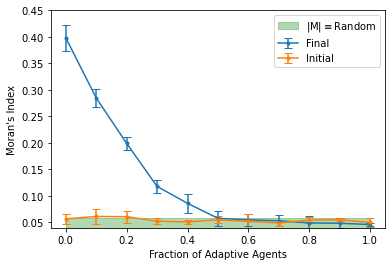

Lower bound:  0.05040735917841688
Upper bound:  0.0585265100275055


In [11]:
fig, ax = plt.subplots()

# plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_pop_final'],
#         marker='o',
#         label='Final')

plt.errorbar(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_pop_final'], 
             yerr = yerr_pop_final,
             capsize=4,
             marker='.',
             label='Final')

# plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_pop_initial'],
#         marker='o',
#         label='Initial')

plt.errorbar(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_pop_initial'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up_BroadenThres['p_adap'], 
                -sum_up_BroadenThres['seg_pop_initial'].mean() - sum_up_BroadenThres['seg_pop_initial'].std(),
                sum_up_BroadenThres['seg_pop_initial'].mean() + sum_up_BroadenThres['seg_pop_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(0.04,0.45)
plt.legend()
plt.show()

print("Lower bound: ", sum_up_BroadenThres['seg_pop_initial'].mean() - sum_up_BroadenThres['seg_pop_initial'].std() )
print("Upper bound: ", sum_up_BroadenThres['seg_pop_initial'].mean() + sum_up_BroadenThres['seg_pop_initial'].std() )

fig.savefig('DifThreshold_SegPop.pdf', bbox_inches='tight', dpi=150)

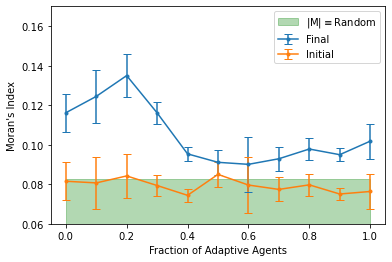

Lower bound:  0.0759612241816443
Upper bound:  0.08282608390059307


In [12]:
fig, ax = plt.subplots()

# plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_threshold_final'],
#         marker='o',
#         label='Final')

# plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_threshold_initial'],
#         marker='o',
#         label='Initial')

plt.errorbar(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_threshold_final'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Final')

plt.errorbar(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['seg_threshold_initial'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up_BroadenThres['p_adap'], 
                -sum_up_BroadenThres['seg_threshold_initial'].mean() - sum_up_BroadenThres['seg_threshold_initial'].std(),
                sum_up_BroadenThres['seg_threshold_initial'].mean() + sum_up_BroadenThres['seg_threshold_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(0.06,0.17)
plt.legend()
plt.show()


print("Lower bound: ", sum_up_BroadenThres['seg_threshold_initial'].mean() - sum_up_BroadenThres['seg_threshold_initial'].std() )
print("Upper bound: ", sum_up_BroadenThres['seg_threshold_initial'].mean() + sum_up_BroadenThres['seg_threshold_initial'].std() )

fig.savefig('DifThreshold_SegThreshold.pdf', bbox_inches='tight', dpi=150)

## Comparision of mean final thresholds for equal and dif thresholds 

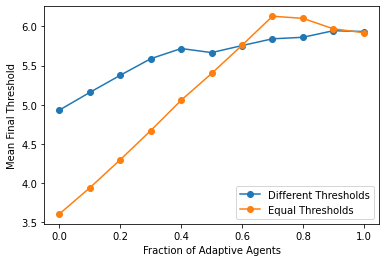

In [13]:
fig, ax = plt.subplots()

plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['mean_final_threshold'],
        marker='o',
        label='Different Thresholds')

plt.plot(sum_up_BroadenThres['p_adap'], sum_up['mean_final_threshold'],
        marker='o',
        label='Equal Thresholds')



plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Mean Final Threshold')

plt.legend(loc='lower right')
plt.show()

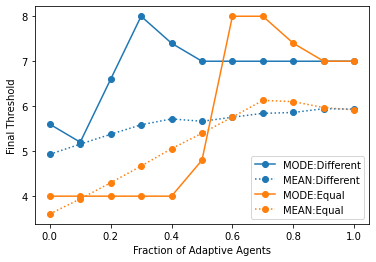

In [14]:
fig, ax = plt.subplots()

plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['mode_final_threshold'],
        marker='o',
        label='MODE:Different')


plt.plot(sum_up_BroadenThres['p_adap'], sum_up_BroadenThres['mean_final_threshold'],
        marker='o', ls=':', c='#1f77b4',
        label='MEAN:Different')

plt.plot(sum_up_BroadenThres['p_adap'], sum_up['mode_final_threshold'],
        marker='o',
        label='MODE:Equal')

plt.plot(sum_up_BroadenThres['p_adap'], sum_up['mean_final_threshold'],
        marker='o', ls=':', c='#ff7f0e',
        label='MEAN:Equal')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Final Threshold')

plt.legend(loc='lower right')
plt.show()

fig.savefig('Comparing_MODEMEAN_EqualDif.pdf', bbox_inches='tight', dpi=150)

# Less Empty Places : $n = 4$ and empty=1%

In [26]:
#--------------------
#   Fazer as médias com todas as runs
#--------------------

read_overall_Empty = pd.read_csv('df_overall_empty.csv', delimiter = ',')
#read_overall 

sum_up_Empty = pd.DataFrame(columns=[
                            'p_adap', 
                            'seg_pop_initial',
                            'seg_pop_final', 
                            'seg_threshold_initial',
                            'seg_threshold_final',
                            'mean_final_threshold',
                            'mode_final_threshold',
                            '2nd_mode_final_threshold'])

yerr_pop_initial=[]
yerr_pop_final=[]

yerr_thre_initial=[]
yerr_thre_final=[]

for p in np.arange(0,1.05,0.1):
    p_overall_Empty = read_overall_Empty.loc[(read_overall_Empty['p_adap']>= p - 0.01) & (read_overall_Empty['p_adap']<= p + 0.01)]
    
    sum_up_Empty = sum_up_Empty.append({'p_adap':                   p, 
                            'seg_pop_initial':          p_overall_Empty['seg_pop_initial'].mean(),
                            'seg_pop_final':            p_overall_Empty['seg_pop_final'].mean(), 
                            'seg_threshold_initial':    p_overall_Empty['seg_threshold_initial'].mean(),
                            'seg_threshold_final':      p_overall_Empty['seg_threshold_final'].mean(),
                            'mean_final_threshold':     p_overall_Empty['mean_final_threshold'].mean(),
                            'mode_final_threshold':     p_overall_Empty['mode_final_threshold'].mean(),
                            '2nd_mode_final_threshold': p_overall_Empty['2nd_mode_final_threshold'].mean()
     },ignore_index=True)
    
    
    yerr_pop_initial.append(abs(p_overall_Empty['seg_pop_initial'].std())) 
    yerr_thre_initial.append(abs(p_overall_Empty['seg_threshold_initial'].std()))
    
    yerr_pop_final.append(abs(p_overall_Empty['seg_pop_final'].std())) 
    yerr_thre_final.append(abs(p_overall_Empty['seg_threshold_final'].std()))
    

sum_up_Empty

,p_adap,seg_pop_initial,seg_pop_final,seg_threshold_initial,seg_threshold_final,mean_final_threshold,mode_final_threshold,2nd_mode_final_threshold
0,0.0,0.004368,0.849123,0.010021,0.010021,3.96032,4.0,0.0
1,0.1,0.007417,0.794712,0.010514,-0.017930,4.35264,4.0,8.0
2,0.2,-0.003997,0.693833,0.008962,0.019000,4.75936,4.0,8.0
3,0.3,-0.001073,0.582920,0.010346,0.118865,5.13536,4.0,8.0
4,0.4,0.004636,0.467858,0.009208,0.216172,5.54880,4.0,8.0
5,0.5,-0.000528,0.343454,0.009862,0.267023,5.94848,6.4,5.6
6,0.6,0.005180,0.244643,0.008309,0.273307,6.35104,8.0,4.0
7,0.7,-0.001655,0.136864,0.012315,0.240570,6.72352,8.0,4.0
8,0.8,0.000768,0.061489,0.010437,0.133217,7.12720,8.0,4.0
9,0.9,0.000176,0.019755,0.011984,0.018615,7.47664,8.0,4.0


In [28]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall_Empty.loc[(read_overall_Empty['p_adap']<= p + 0.01) & (read_overall_Empty['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall_Empty['seg_pop_initial'], p_overall['seg_pop_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=-191.416, p=0.000
Different distributions (reject H0)
--------------Probability:  0.1
Statistics=-189.073, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-120.151, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-119.600, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-65.460, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-70.220, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-53.398, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-29.171, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-13.715, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-3.903, p=0.000
Different distributions (re

In [29]:
for count, p in enumerate(np.arange(0,1.05,0.1)):
    print("--------------Probability: ", p)
    p_overall = read_overall_Empty.loc[(read_overall_Empty['p_adap']<= p + 0.01) & (read_overall_Empty['p_adap']>= p - 0.01)]
    
    
    # compare samples
    stat, p = ttest_ind(read_overall_Empty['seg_threshold_initial'], p_overall['seg_threshold_final'])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

--------------Probability:  0.0
Statistics=0.025, p=0.980
Same distributions (fail to reject H0)
--------------Probability:  0.1
Statistics=24.260, p=0.000
Different distributions (reject H0)
--------------Probability:  0.2
Statistics=-4.594, p=0.000
Different distributions (reject H0)
--------------Probability:  0.30000000000000004
Statistics=-66.464, p=0.000
Different distributions (reject H0)
--------------Probability:  0.4
Statistics=-53.044, p=0.000
Different distributions (reject H0)
--------------Probability:  0.5
Statistics=-100.795, p=0.000
Different distributions (reject H0)
--------------Probability:  0.6000000000000001
Statistics=-190.164, p=0.000
Different distributions (reject H0)
--------------Probability:  0.7000000000000001
Statistics=-73.062, p=0.000
Different distributions (reject H0)
--------------Probability:  0.8
Statistics=-36.112, p=0.000
Different distributions (reject H0)
--------------Probability:  0.9
Statistics=-5.826, p=0.000
Different distributions (rejec

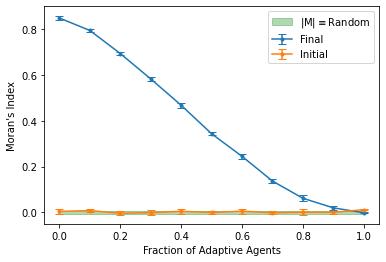

Lower bound:  -0.007080831277351376
Upper bound:  0.007080831277351376


In [17]:
fig, ax = plt.subplots()

# plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['seg_pop_final'],
#         marker='o',
#         label='Final')

# plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['sum_up_Empty'],
#         marker='o',
#         label='Initial')

plt.errorbar(sum_up_Empty['p_adap'], sum_up_Empty['seg_pop_final'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Final')

plt.errorbar(sum_up_Empty['p_adap'], sum_up_Empty['seg_pop_initial'], 
             yerr = yerr_pop_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up_Empty['p_adap'], 
                -sum_up_Empty['seg_pop_initial'].mean() - sum_up_Empty['seg_pop_initial'].std(),
                sum_up_Empty['seg_pop_initial'].mean() + sum_up_Empty['seg_pop_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(-0.05,0.9)
plt.legend()
plt.show()

print("Lower bound: ", -sum_up_Empty['seg_pop_initial'].mean() - sum_up_Empty['seg_pop_initial'].std() )
print("Upper bound: ", sum_up_Empty['seg_pop_initial'].mean() + sum_up_Empty['seg_pop_initial'].std() )


fig.savefig('Empty_SegPop.pdf', bbox_inches='tight', dpi=150)

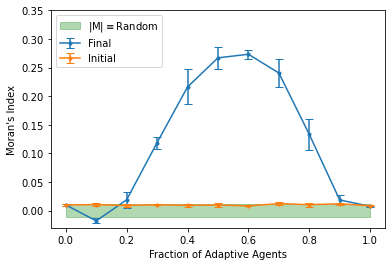

Lower bound:  -0.011331946214373717
Upper bound:  0.011331946214373717


In [18]:
fig, ax = plt.subplots()

# plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['seg_threshold_final'],
#         marker='o',
#         label='Final')

# plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['seg_threshold_initial'],
#         marker='o',
#         label='Initial')

plt.errorbar(sum_up_Empty['p_adap'], sum_up_Empty['seg_threshold_final'], 
             yerr = yerr_thre_final,
             capsize=4,
             marker='.',
             label='Final')

plt.errorbar(sum_up_Empty['p_adap'], sum_up_Empty['seg_threshold_initial'], 
             yerr = yerr_thre_initial,
             capsize=4,
             marker='.',
             label='Initial')

ax.fill_between(sum_up_Empty['p_adap'], 
                -sum_up_Empty['seg_threshold_initial'].mean() - sum_up_Empty['seg_threshold_initial'].std(),
                sum_up_Empty['seg_threshold_initial'].mean() + sum_up_Empty['seg_threshold_initial'].std(),
                color= 'green',alpha= 0.3,label='|M|$\equiv$Random')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Moran\'s Index')
plt.ylim(-0.03,0.35)
plt.legend()
plt.show()


print("Lower bound: ", -sum_up_Empty['seg_threshold_initial'].mean() - sum_up_Empty['seg_threshold_initial'].std() )
print("Upper bound: ", sum_up_Empty['seg_threshold_initial'].mean() + sum_up_Empty['seg_threshold_initial'].std() )


fig.savefig('Empty_SegThreshold.pdf', bbox_inches='tight', dpi=150)

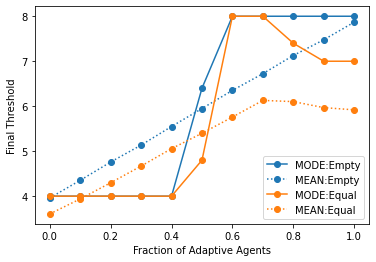

In [19]:
fig, ax = plt.subplots()

plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['mode_final_threshold'],
        marker='o',
        label='MODE:Empty')


plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['mean_final_threshold'],
        marker='o', ls=':', c='#1f77b4',
        label='MEAN:Empty')

plt.plot(sum_up_Empty['p_adap'], sum_up['mode_final_threshold'],
        marker='o',
        label='MODE:Equal')

plt.plot(sum_up_Empty['p_adap'], sum_up['mean_final_threshold'],
        marker='o', ls=':', c='#ff7f0e',
        label='MEAN:Equal')


plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Final Threshold')

plt.legend(loc='lower right')
plt.show()

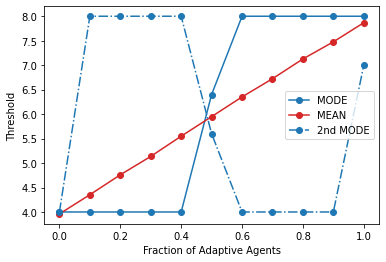

In [20]:
fig, ax = plt.subplots()

plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['mode_final_threshold'],
        marker='o',
        label='MODE')

plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['mean_final_threshold'],
        marker='o', ls='-', c='tab:red',
        label='MEAN')


sum_up_Empty.at[0,'2nd_mode_final_threshold'] = 4
plt.plot(sum_up_Empty['p_adap'], sum_up_Empty['2nd_mode_final_threshold'],
        marker='o', ls='-.', c='#1f77b4',
        label='2nd MODE')

plt.xlabel('Fraction of Adaptive Agents')
plt.ylabel('Threshold')


plt.legend()

plt.show()

fig.savefig('MODEMEAN_Empty.pdf', bbox_inches='tight', dpi=150)